In [11]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'

titanic = pd.read_excel(titanic_url)
titanic.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
titanic['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

<Axes: ylabel='count'>

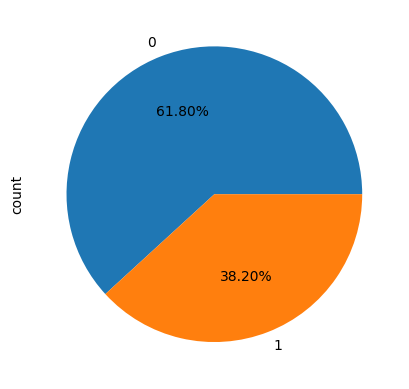

In [14]:
titanic['survived'].value_counts().plot.pie(autopct='%1.2f%%')

<Axes: ylabel='count'>

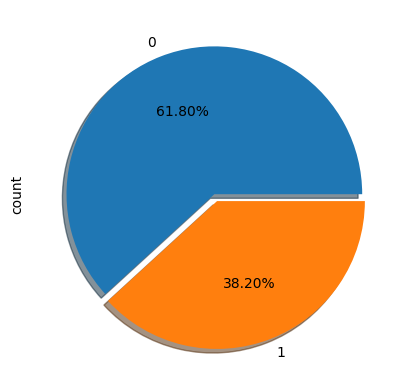

In [15]:
titanic['survived'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, explode=[0, 0.05])

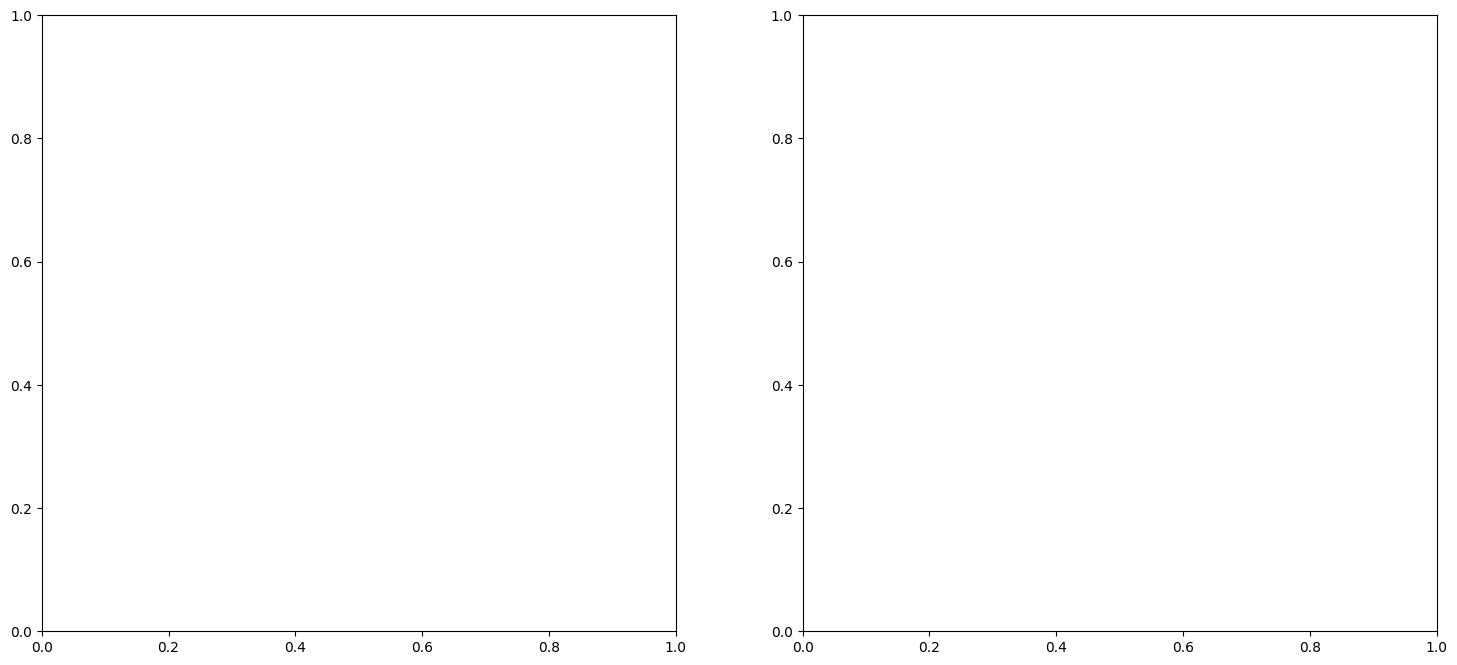

In [16]:
f, ax = plt.subplots(1,2, figsize=(18,8)) # 1행 2열의 그래프를 만들고, 전체 그래프의 크기를 가로 18인치, 세로 8인치로 설정

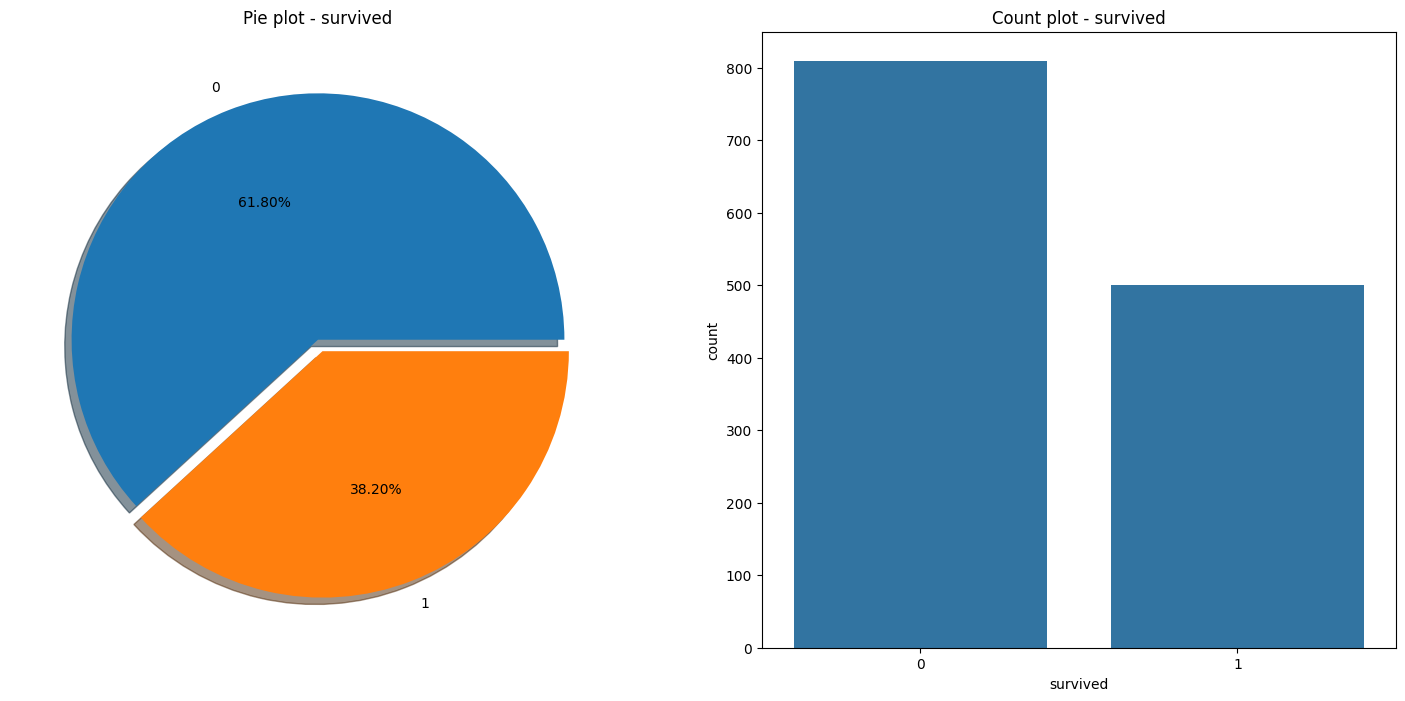

In [17]:
f, ax = plt.subplots(1,2, figsize=(18,8)) # 1행 2열의 그래프를 만들고, 전체 그래프의 크기를 가로 18인치, 세로 8인치로 설정

titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.2f%%', shadow=True, explode=[0, 0.05])
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

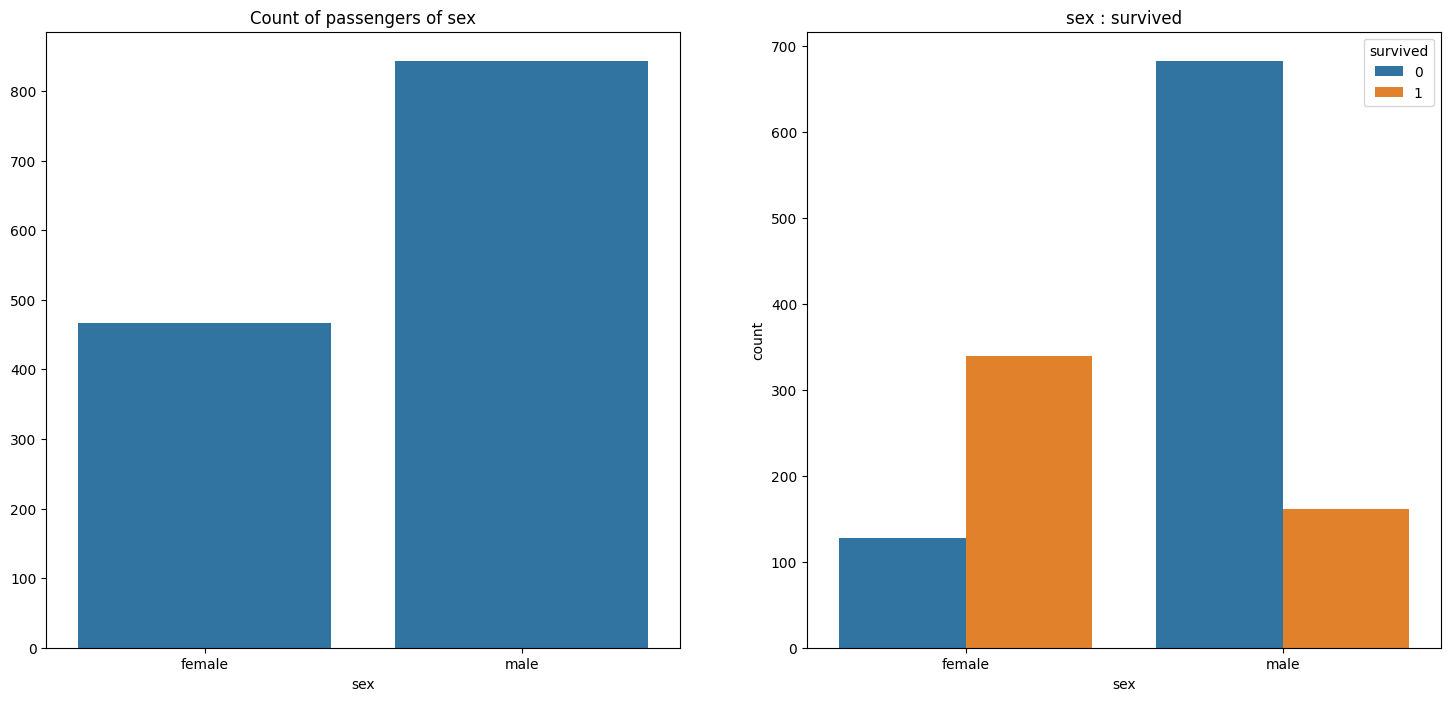

In [18]:
# 성별에 따른 생존 현황


f, ax = plt.subplots(1,2, figsize=(18,8)) # 1행 2열의 그래프를 만들고, 전체 그래프의 크기를 가로 18인치, 세로 8인치로 설정

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of passengers of sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, hue='survived' ,ax=ax[1])
ax[1].set_title('sex : survived')

plt.show()

In [19]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


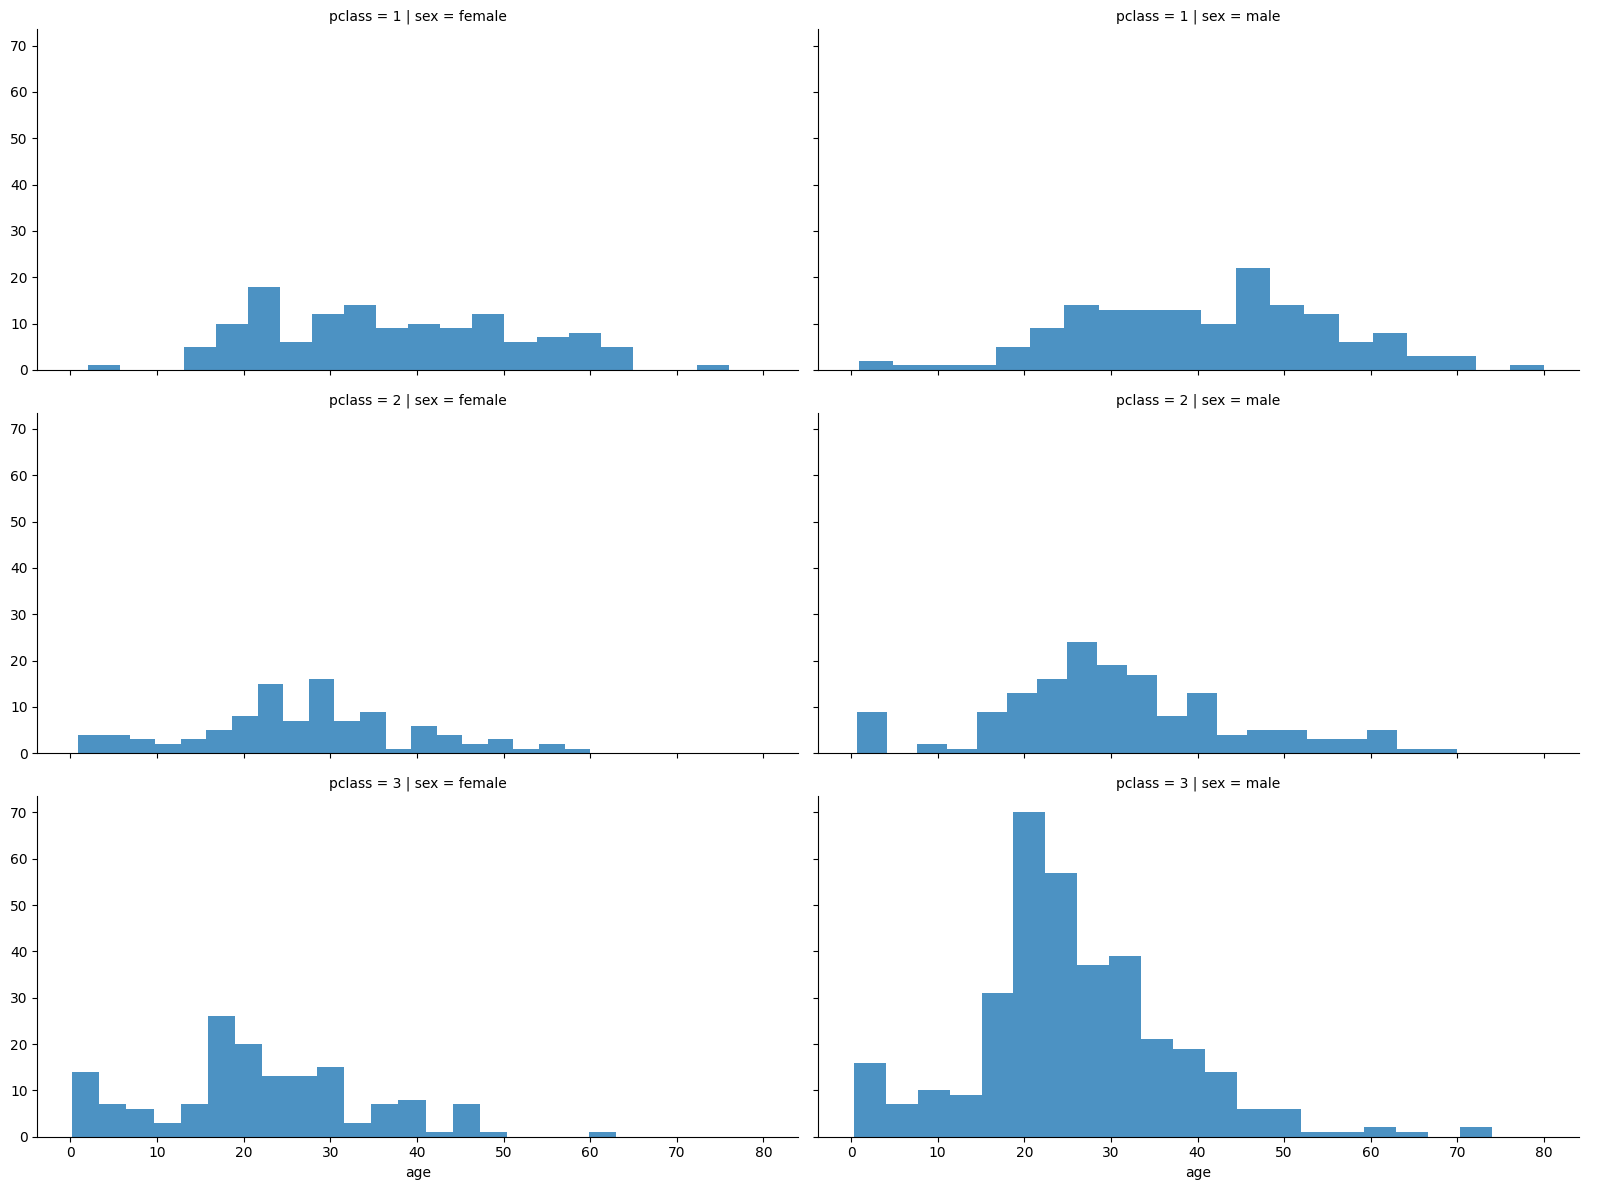

In [20]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend()


In [21]:
import plotly_express as px



ModuleNotFoundError: No module named 'plotly_express'

In [ ]:
fig = px.histogram(titanic, x='age')
fig.show()

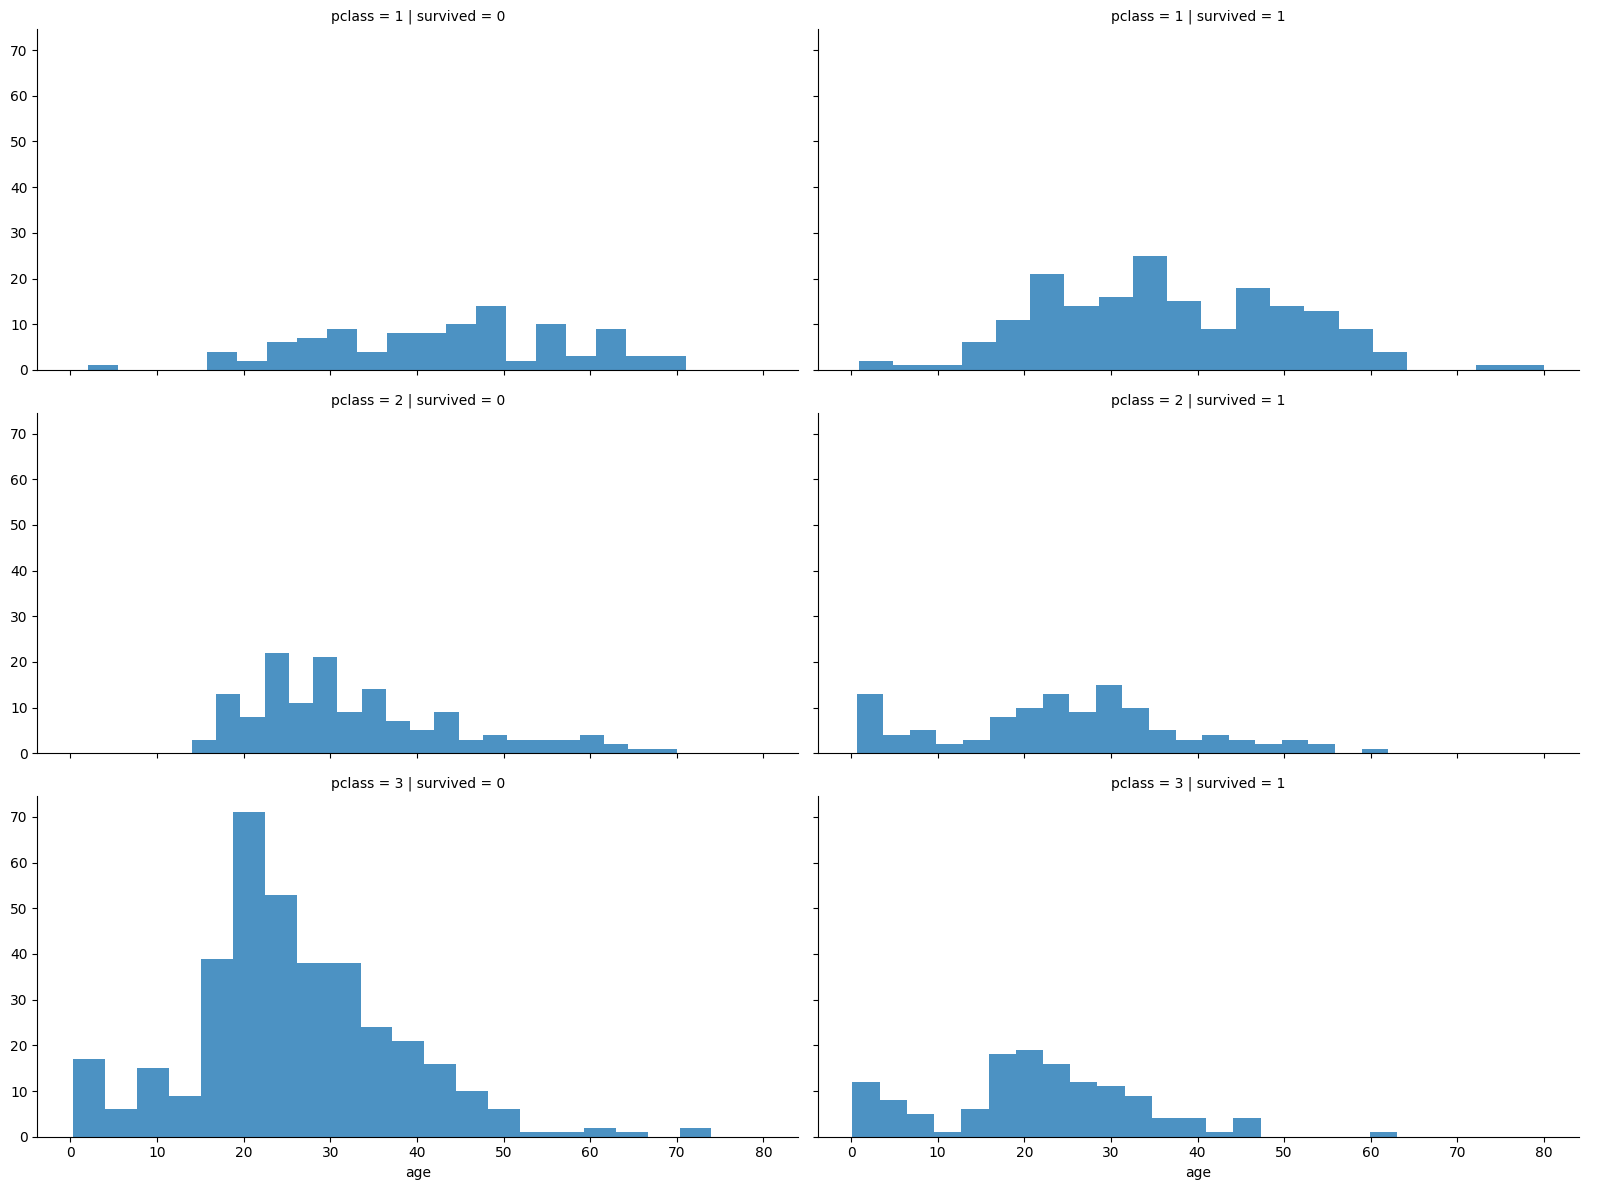

In [22]:
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend()

In [23]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0,7, 15,30,60,100] ,
       include_lowest=True,
       labels=['baby', 'teenage', 'young', 'adult', 'old'])

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


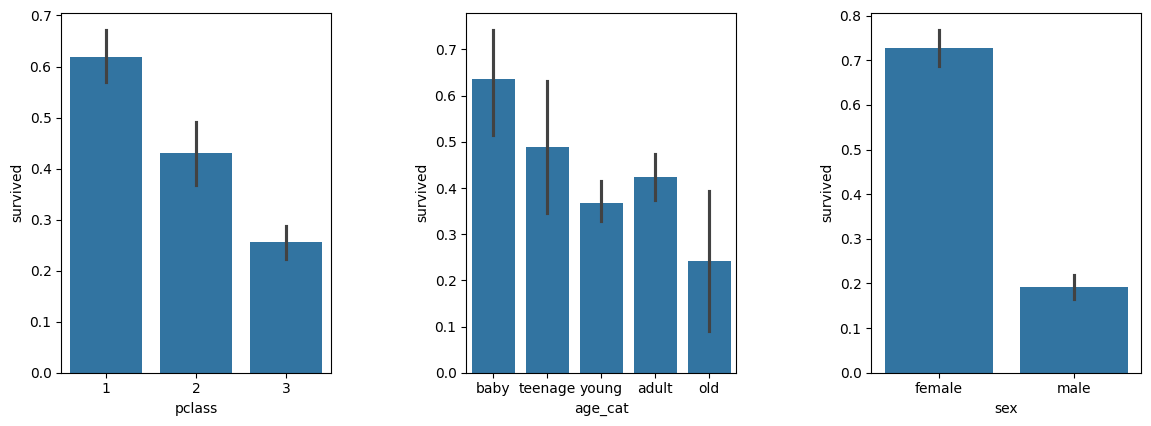

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=titanic)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

plt.show()

/var/folders/fv/zlmhjmxs6c75txtbq7vk_ypw0000gn/T/ipykernel_48484/1603988878.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['survived']==1]['age'], bins=20, label='survived', ax=axes[0], kde=False)
/var/folders/fv/zlmhjmxs6c75txtbq7vk_ypw0000gn/T/ipykernel_48484/1603988878.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwasko

/var/folders/fv/zlmhjmxs6c75txtbq7vk_ypw0000gn/T/ipykernel_48484/1603988878.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(men[men['survived']==1]['age'], bins=18, label='survived', ax=axes[1], kde=False)
/var/folders/fv/zlmhjmxs6c75txtbq7vk_ypw0000gn/T/ipykernel_48484/1603988878.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/

Text(0.5, 1.0, 'Male')

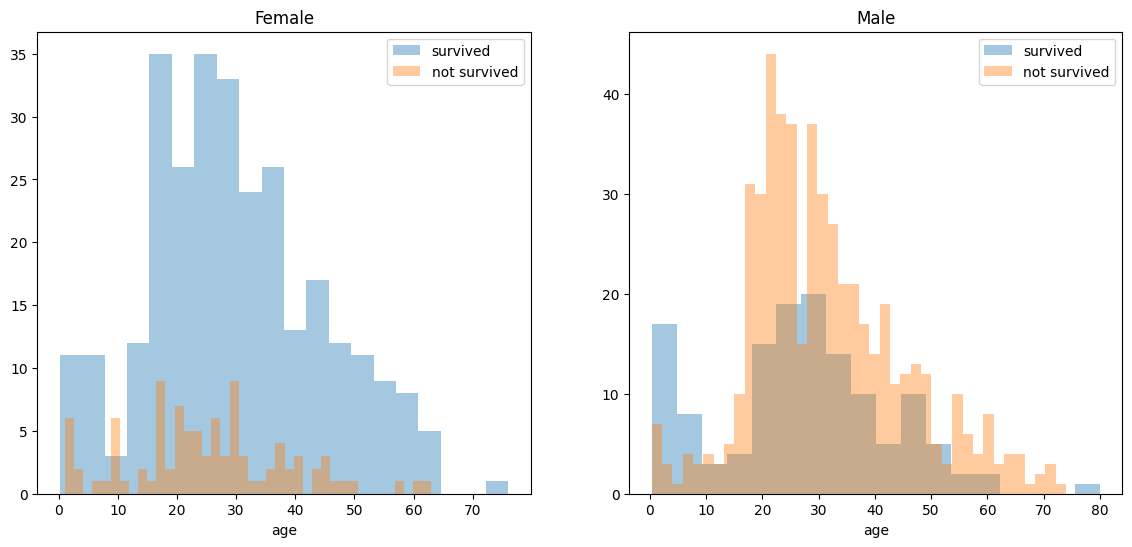

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.distplot(women[women['survived']==1]['age'], bins=20, label='survived', ax=axes[0], kde=False)
ax = sns.distplot(women[women['survived']==0]['age'], bins=40, label='not survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')

ax = sns.distplot(men[men['survived']==1]['age'], bins=18, label='survived', ax=axes[1], kde=False)
ax = sns.distplot(men[men['survived']==0]['age'], bins=40, label='not survived', ax=axes[1], kde=False)
ax.legend(); ax.set_title('Male')

In [35]:
import re

title=[]

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [36]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [37]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [38]:
titanic['title'] = titanic['title'].replace('Mlle','Miss')
titanic['title'] = titanic['title'].replace('Ms','Miss')
titanic['title'] = titanic['title'].replace('Mme','Mrs')

Rare_f = ['Dona','Dr','Lady','the Countess']
Rare_m = ['Capt','Col','Don','Major','Rev','Sir','Dr','Master','Jonkheer']



In [39]:
for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

    


In [40]:
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [41]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [42]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,0.636364
4,Rare_m,0.443038


In [44]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 6.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 10.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 5.8 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
 16  gender     1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 165.2+ KB


In [45]:
# 머신러닝을 이용한 생존자 예측

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(titanic['sex'])



LabelEncoder()

In [47]:
le.classes_

array(['female', 'male'], dtype=object)

In [48]:
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [50]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
 16  gender     1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 165.2+ KB


In [51]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 140.0+ KB


In [56]:
from sklearn.model_selection import train_test_split

X= titanic[['pclass','age','sibsp','parch','fare','gender']]
y = titanic['survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8, random_state=13)


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [58]:
pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [60]:
import numpy as np

dica = np.array([[3,18,0,0,5,1]])
print('Dicarprio: ', dt.predict_proba(dica)[0,1])




Dicarprio:  0.22950819672131148


/Users/mac/opt/miniconda3/envs/py3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [64]:
winslet = np.array([[1,16,1,1,100,0]])
print('Winslet: ', dt.predict_proba(winslet)[0,1])

Winslet:  1.0


/Users/mac/opt/miniconda3/envs/py3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
